In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv("Personal_Loan_Dataset.csv")

In [6]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

In [7]:
print (x)

[[ 1 49]
 [19 34]
 [15 11]
 ...
 [39 24]
 [40 49]
 [ 4 83]]


In [8]:
print (y)

[0 0 0 ... 0 0 1]


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[ 0.4332751   1.91789253]
 [-0.26260011 -0.65070583]
 [-0.78450651 -1.08240303]
 ...
 [-1.65435051 -1.08240303]
 [ 1.1291503  -0.54278153]
 [-0.95847531 -0.78021499]]


In [12]:
print(x_test)

[[ 0.8681971  -1.10398789]
 [-0.95847531  0.19110372]
 [ 0.3462907  -0.04632974]
 ...
 [ 0.4332751  -0.0679146 ]
 [-0.87149091  0.08317942]
 [-1.21942851 -0.97447873]]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[738 138]
 [311  63]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


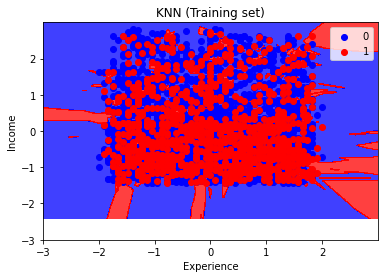

In [20]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.01), 
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,0].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x1.min(),x1.max())
for i,j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set ==j, 1],
              c = ListedColormap(('blue','red'))(i),label = j)
plt.title('KNN (Training set)')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


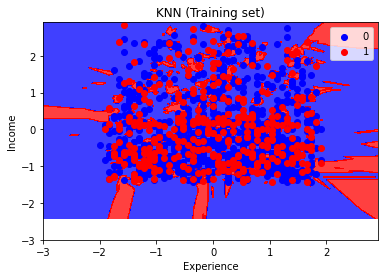

In [21]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.01), 
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,0].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x1.min(),x1.max())
for i,j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set ==j, 1],
              c = ListedColormap(('blue','red'))(i),label = j)
plt.title('KNN (Training set)')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.legend()
plt.show()